In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
def func(IR, P1):
    Year = np.linspace(0,len(P1)-1,len(P1))
    DF = (1 + IR/100)**(-Year)

    F1 = (P1 * DF).round()

    pro1 = sum(F1)
    
    return pro1

In [142]:
P = np.array([-20000, 6000, 5500, 5000, 4500, 4000, 4000])

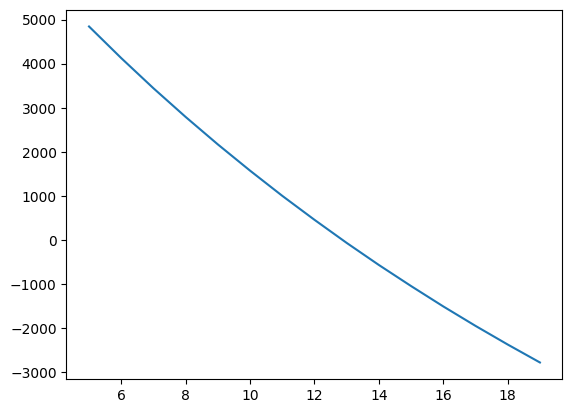

In [143]:
x = []
y = []
for i in range(5,20):
    x.append(i)
    y.append(func(i,P))

plt.plot(x,y)
plt.show()

Average loss is 4745922.290563911 and the values are [   3.11799127 -117.3787694 ]
Average loss is 140447.82403012592 and the values are [6214.13909815 -475.72998498]
Average loss is 45909.79132227957 and the values are [6913.60473001 -515.82465492]
Average loss is 42342.95292925274 and the values are [6992.37351506 -520.33982806]
Average loss is 42031.059109121285 and the values are [7001.24388869 -520.84829436]
Average loss is 41997.07440258998 and the values are [7002.24280633 -520.90555418]
Average loss is 41993.26172798453 and the values are [7002.35529724 -520.91200237]
Average loss is 41992.8325551159 and the values are [7002.36796516 -520.91272852]
Average loss is 41992.78422707688 and the values are [7002.36939173 -520.91281029]
Average loss is 41992.7787847512 and the values are [7002.36955238 -520.9128195 ]


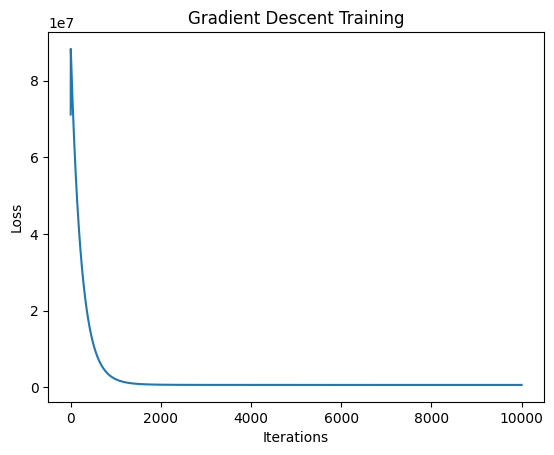

In [145]:
import numpy as np

# Assume func(i, P) is defined

x = []
y = []
for i in range(5, 20):
    x.append(i)
    y.append(func(i, P))
    
a = np.array(x)
b = np.array(y)

# Prepare the feature matrix with powers of 'a'
order = 2
stack = list(a**i for i in range(order))
X = np.column_stack(stack)

# Initialize the parameter vector
theta = np.random.randn(order)

iters = 10000
alpha = 0.01
losses = []

for i in range(iters):
    total_loss = 0
    for x in range(len(a)):
        # Compute the predicted value using the dot product
        yp = np.dot(X[x], theta)
        
        # Calculate the loss and update the total_loss
        loss = (b[x] - yp)**2
        total_loss += loss
        
        # Compute the gradient
        gradient = -2 * (b[x] - yp) * X[x]
        
        # Update the parameter vector using gradient descent
        theta = theta - alpha * gradient / len(a)
    losses.append(total_loss)
    if i % 1000 == 0:
        print(f'Average loss is {total_loss / len(a)} and the values are {theta}')

plt.plot(range(len(losses)), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Training')
plt.show()


Using linear regression to predict the equation as the manually implementing linear regression is giving high error

0.2


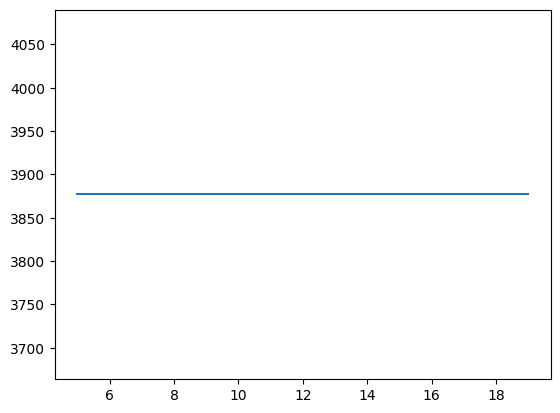

In [146]:
count = 0
y_ = []
for i in range(len(a)):
    stack = tuple(a[i]**i for i in range(order))
    y_pred = np.dot(stack,theta)
    if abs(y_pred - b[i]) < 1000:
        count += 1
    y_.append(y_pred)
print(count/len(a))
plt.plot(a,y_)
plt.show()

The output is really unhealthy and any further calculations will make it worse. A good alternate is using sklearn libraries

Values of intercept: 8636.269683257942 and coeff: [   0.         -822.50255333   11.73254686]


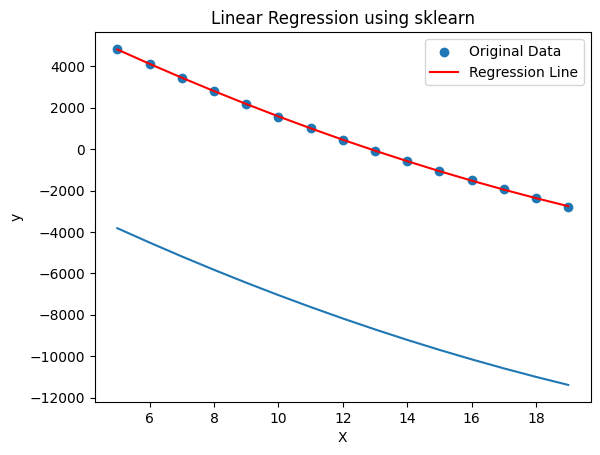

In [149]:

from sklearn.linear_model import LinearRegression
import pandas as pd
# Assume func(i, P) is defined

x = []
y = []
for i in range(5, 20):
    x.append(i)
    y.append(func(i, P))

a = np.array(x).reshape(-1, 1)
b = np.array(y)
        
# Create a polynomial feature matrix
order = 3         #a higher degree gives a better result
poly = np.column_stack([a**i for i in range(order)])

# Initialize the LinearRegression model
model = LinearRegression()

# Perform linear regression
model.fit(poly, b)

theta = np.append(model.intercept_,model.coef_)
print(f'Values of intercept: {model.intercept_} and coeff: {model.coef_}') #this is of the form T + c + bx + .... 

# Predict using the trained model
y_pred = model.predict(poly)
#theta[0] is the constant intercept which is not a part of equation but can be added to theta[1]
#theta[1] is the first constant
# Plot original data and regression line

plt.scatter(a, b, label='Original Data')
plt.plot(a, y_pred, color='red', label='Regression Line')
dx = np.dot(poly, theta[1:])
plt.plot(x, dx)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using sklearn')
plt.legend()
plt.show()

data = {'Predicted': y_pred, 'Actual': b}

# Create a DataFrame using the dictionary
df = pd.DataFrame(data)
theta[1] += theta[0]

This works wonders!!

In [154]:
count = 0
for i in range(len(a)):
    if abs(y_pred[i] - b[i]) < 25:
        count += 1
print(f'accuracy: {count/len(a)}\n')

index_closest = np.argmin(np.abs(df['Predicted']))
print(f'The zero IRR is at {index_closest+5} %\n') #loop initial value works better
tes = theta[1:]
roots = np.roots(tes[::-1])
print("Roots:", roots)
# print(f'{tes[0]} + {tes[1]}x + {tes[2]}x**2')

accuracy: 0.9333333333333333

The zero IRR is at 13 %

Roots: [57.24586399 12.85848443]


In [155]:
a_transpose = a.T

a_transpose_a = np.dot(a_transpose,a) 


a_transpose_a_inv = (a_transpose_a)


theta = a_transpose_a_inv * (np.dot(a_transpose, b))

np.dot(a_transpose, b), a_transpose_a_inv, 

# 1 * n . n * 1


(array([-30006.]), array([[2440]]))